In [1]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # solve_ivp import

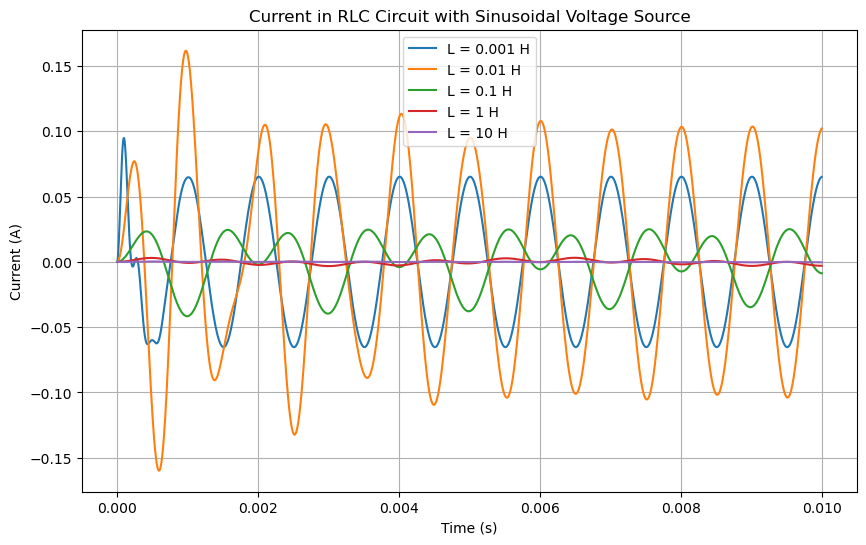

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation
def circuit_ode(t, y, R, C, L, E_ext, omega):
    q, i = y  # q = charge, i = current
    dqdt = i
    didt = (E_ext * np.sin(omega * t) - R * i - q / C) / L
    return [dqdt, didt]

# Parameters
R = 10  # Resistance in ohms
C = 1e-6  # Capacitance in farads
E_ext = 10  # External voltage amplitude
omega = 2 * np.pi * 1000  # Angular frequency of the source (1 kHz)
q0, i0 = 0, 0  # Initial charge and current

# Time span for simulation
t_span = (0, 0.01)  # 10 ms
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Varying inductance values
inductances = [1e-3, 1e-2, 1e-1, 1, 10]  # Inductances in henries

# Solve and plot for each value of L
plt.figure(figsize=(10, 6))

for L in inductances:
    sol = solve_ivp(circuit_ode, t_span, [q0, i0], args=(R, C, L, E_ext, omega), t_eval=t_eval, method='RK45')
    plt.plot(sol.t, sol.y[1], label=f"L = {L} H")  # sol.y[1] is the current

plt.title("Current in RLC Circuit with Sinusoidal Voltage Source")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [3]:
import math

# Parameters
R = 50  # Resistance in ohms
L = 10e-3  # Inductance in henries
C = 100e-6  # Capacitance in farads

# Calculate critical resistance
R_c = 2 * math.sqrt(L / C)

# Determine damping condition
if R > R_c:
    damping = "Overdamped"
elif R == R_c:
    damping = "Critically damped"
else:
    damping = "Underdamped"

print(f"Critical resistance: {R_c:.2f} ohms")
print(f"Damping condition: {damping}")


Critical resistance: 20.00 ohms
Damping condition: Overdamped


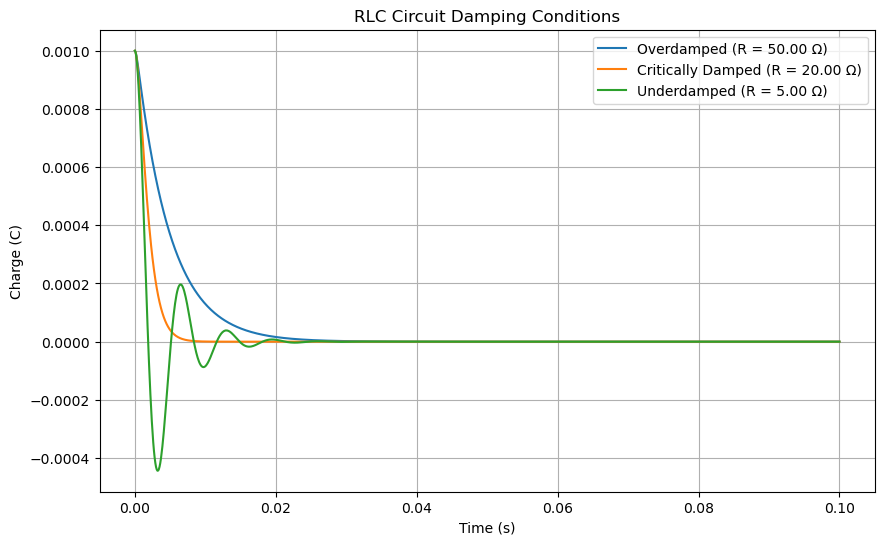

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation for the RLC circuit
def rlc_ode(t, y, R, L, C, E_ext, omega):
    q, i = y  # q = charge, i = current
    dqdt = i
    didt = (E_ext * np.sin(omega * t) - R * i - q / C) / L
    return [dqdt, didt]

# Parameters for the RLC circuit
L = 10e-3  # Inductance in henries
C = 100e-6  # Capacitance in farads
E_ext = 0  # No external voltage for this example (natural response)
omega = 0  # Frequency (not used for undriven response)
q0, i0 = 1e-3, 0  # Initial charge and current

# Time span for simulation
t_span = (0, 0.1)  # 100 ms
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Damping cases
damping_conditions = {
    "Overdamped": 50,  # R > 2 * sqrt(L/C)
    "Critically Damped": 2 * np.sqrt(L / C),
    "Underdamped": 5,  # R < 2 * sqrt(L/C)
}

# Plotting the results
plt.figure(figsize=(10, 6))

for condition, R in damping_conditions.items():
    sol = solve_ivp(rlc_ode, t_span, [q0, i0], args=(R, L, C, E_ext, omega), t_eval=t_eval, method='RK45')
    plt.plot(sol.t, sol.y[0], label=f"{condition} (R = {R:.2f} Ω)")

plt.title("RLC Circuit Damping Conditions")
plt.xlabel("Time (s)")
plt.ylabel("Charge (C)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


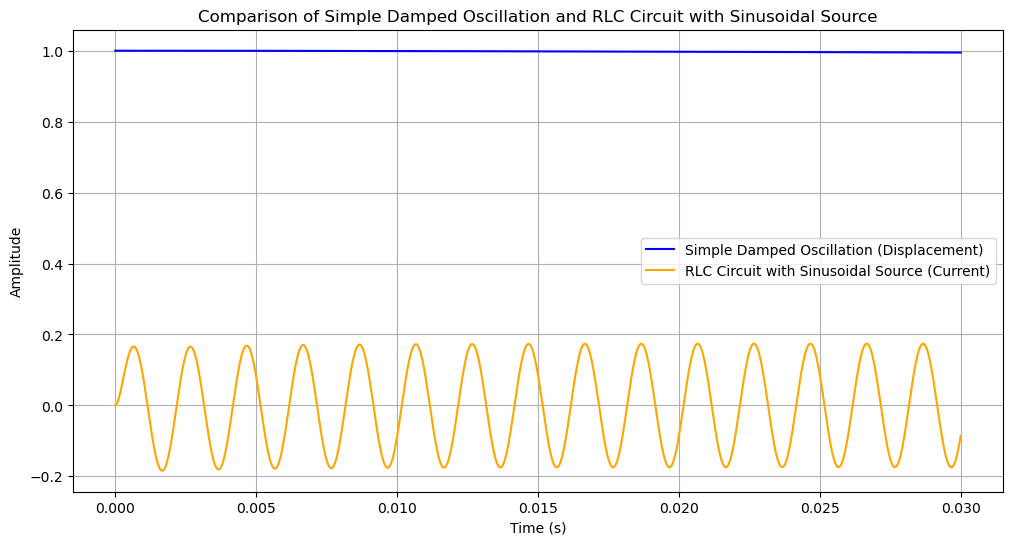

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation for the RLC circuit with a sinusoidal voltage source
def rlc_driven_ode(t, y, R, L, C, E_ext, omega):
    q, i = y  # q = charge, i = current
    dqdt = i
    didt = (E_ext * np.sin(omega * t) - R * i - q / C) / L
    return [dqdt, didt]

# Parameters for RLC circuit
R = 50  # Resistance in ohms
L = 10e-3  # Inductance in henries
C = 100e-6  # Capacitance in farads
E_ext = 10  # Amplitude of the sinusoidal voltage source in volts
omega = 2 * np.pi * 500  # Frequency of the sinusoidal source (500 Hz)
q0, i0 = 0, 0  # Initial charge and current

# Time span for simulation
t_span = (0, 0.03)  # 30 ms
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve for the RLC circuit with sinusoidal voltage source
sol_driven = solve_ivp(rlc_driven_ode, t_span, [q0, i0], args=(R, L, C, E_ext, omega), t_eval=t_eval, method='RK45')

# Define the differential equation for simple damped oscillation
def simple_damped_ode(t, y, b, m, k):
    x, v = y  # v = velocity (dx/dt)
    dxdt = v
    dvdt = -b / m * v - k / m * x
    return [dxdt, dvdt]

# Parameters for simple damped oscillation
k = 25  # Spring constant
b = 100  # Damping coefficient
m = 1  # Mass in kg
x0, v0 = 1.0, 0.0  # Initial displacement and velocity

# Solve for simple damped oscillation
sol_simple = solve_ivp(simple_damped_ode, t_span, [x0, v0], args=(b, m, k), t_eval=t_eval, method='RK45')

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for simple damped oscillation
plt.plot(sol_simple.t, sol_simple.y[0], label="Simple Damped Oscillation (Displacement)", color="blue")

# Plot for RLC circuit with sinusoidal voltage source
plt.plot(sol_driven.t, sol_driven.y[1], label="RLC Circuit with Sinusoidal Source (Current)", color="orange")

plt.title("Comparison of Simple Damped Oscillation and RLC Circuit with Sinusoidal Source")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(loc="best")
plt.grid(True)
plt.show()


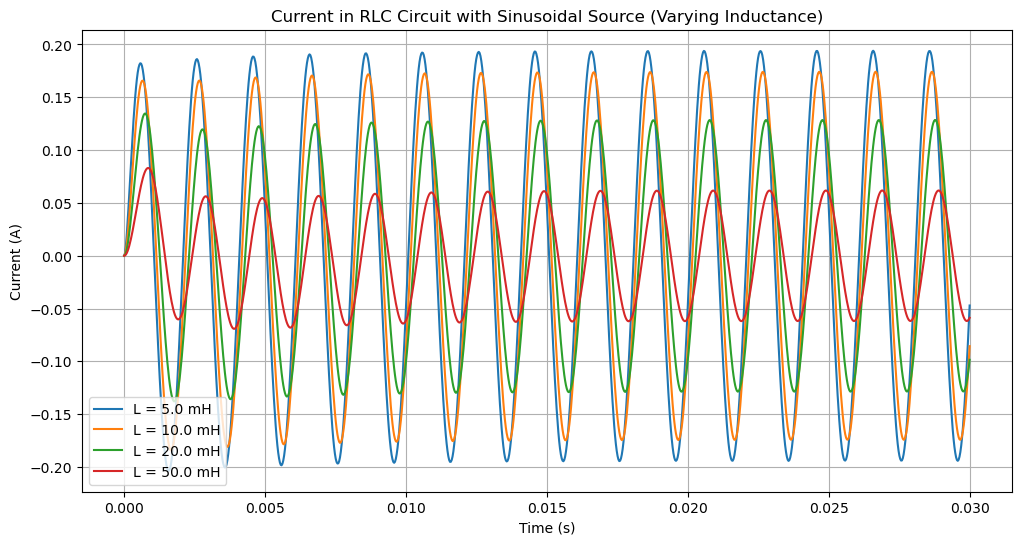

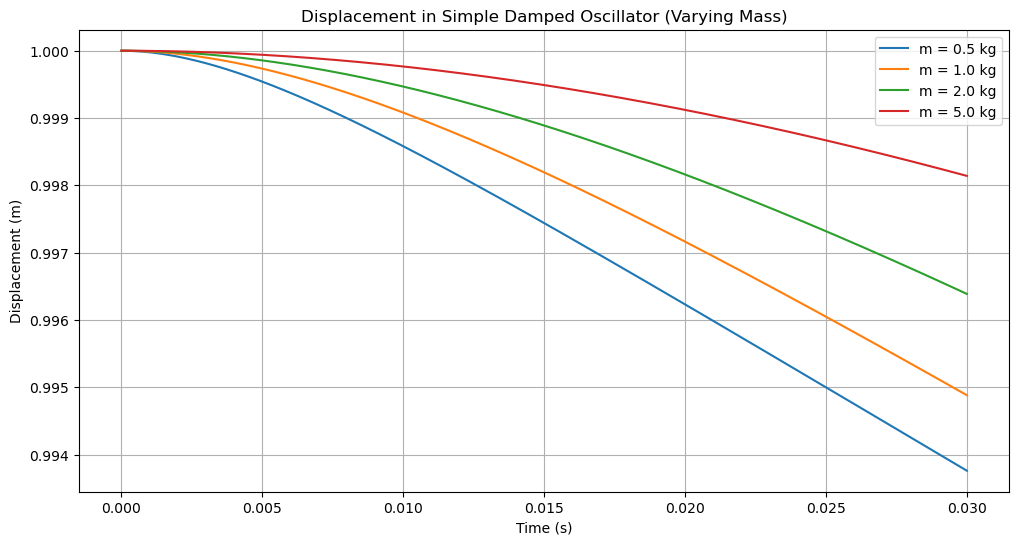

In [6]:
# Parameters for RLC circuit with varying inductance (L)
R = 50  # Resistance in ohms
C = 100e-6  # Capacitance in farads
E_ext = 10  # Amplitude of the sinusoidal voltage source in volts
omega = 2 * np.pi * 500  # Frequency of the sinusoidal source (500 Hz)
q0, i0 = 0, 0  # Initial charge and current

# Varying inductance values
inductances = [5e-3, 10e-3, 20e-3, 50e-3]  # Different values for inductance in henries

# Plotting the current vs time for different inductance values
plt.figure(figsize=(12, 6))
for L in inductances:
    sol_driven = solve_ivp(rlc_driven_ode, t_span, [q0, i0], args=(R, L, C, E_ext, omega), t_eval=t_eval, method='RK45')
    plt.plot(sol_driven.t, sol_driven.y[1], label=f"L = {L * 1e3:.1f} mH")  # Current (y[1])

plt.title("Current in RLC Circuit with Sinusoidal Source (Varying Inductance)")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Parameters for simple damped oscillation with varying mass (m)
k = 25  # Spring constant
b = 100  # Damping coefficient
x0, v0 = 1.0, 0.0  # Initial displacement and velocity

# Varying mass values
masses = [0.5, 1, 2, 5]  # Different mass values in kg

# Plotting the displacement vs time for different mass values
plt.figure(figsize=(12, 6))
for m in masses:
    sol_simple = solve_ivp(simple_damped_ode, t_span, [x0, v0], args=(b, m, k), t_eval=t_eval, method='RK45')
    plt.plot(sol_simple.t, sol_simple.y[0], label=f"m = {m:.1f} kg")  # Displacement (y[0])

plt.title("Displacement in Simple Damped Oscillator (Varying Mass)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


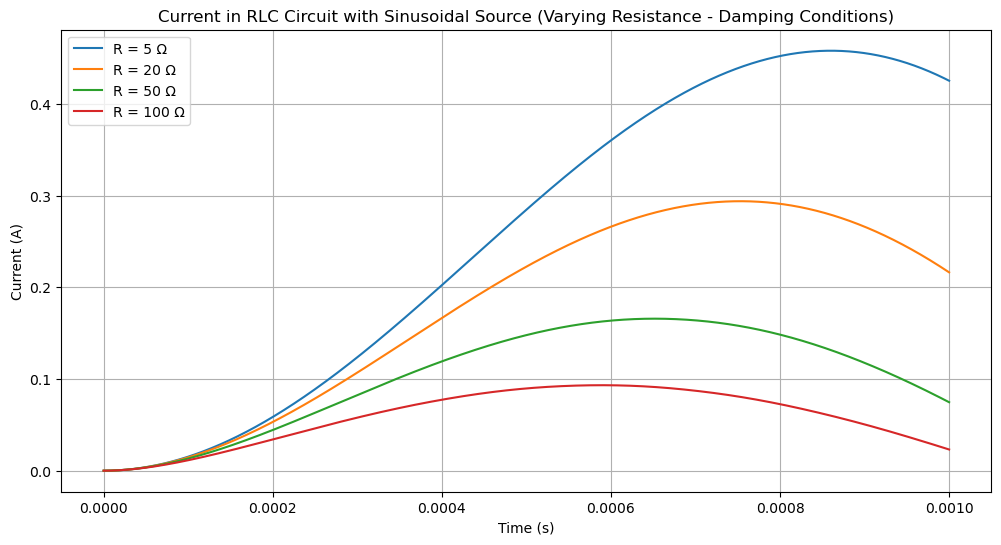

In [ ]:
# Parameters for RLC circuit with sinusoidal voltage source (Varying R for damping conditions)
L = 10e-3  # Inductance in henries
C = 100e-6  # Capacitance in farads
E_ext = 10  # Amplitude of the sinusoidal voltage source in volts
omega = 2 * np.pi * 500  # Frequency of the sinusoidal source (500 Hz)
q0, i0 = 0, 0  # Initial charge and current

# Varying resistance values to show different damping conditions
resistances = [5, 20, 50, 100]  # Different resistance values in ohms

#

# Plotting the current vs time for different resistance values to show damping conditions
plt.figure(figsize=(12, 6))

for R in resistances:
    sol_driven = solve_ivp(rlc_driven_ode, t_span, [q0, i0], args=(R, L, C, E_ext, omega), t_eval=t_eval, method='RK45')
    plt.plot(sol_driven.t, sol_driven.y[1], label=f"R = {R} Ω")  # Current (y[1])

plt.title("Current in RLC Circuit with Sinusoidal Source (Varying Resistance - Damping Conditions)")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


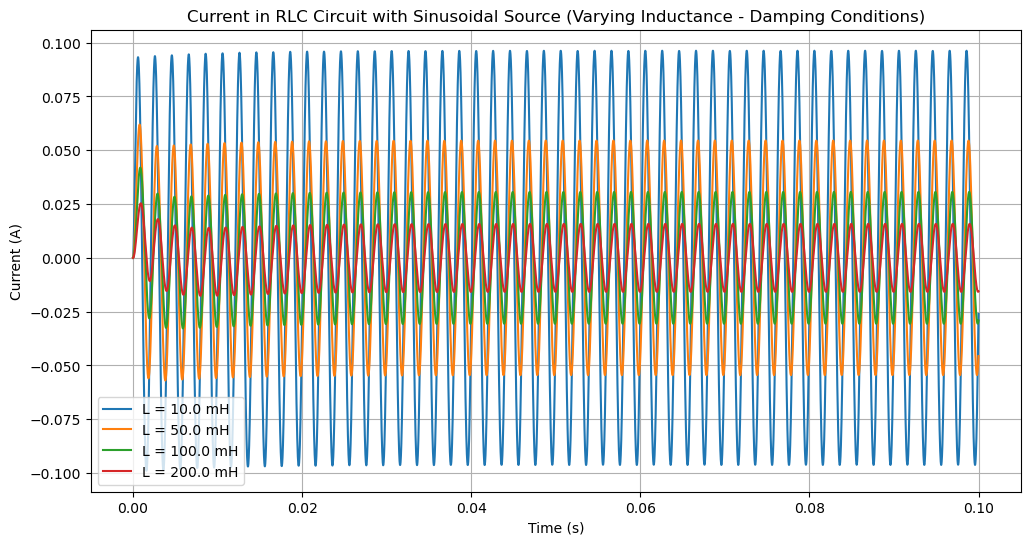

In [19]:
# Time span for simulation
t_span = (0, 0.1)  # 10 ms
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Varying inductance values to show different damping conditions in RLC circuit with sinusoidal source
inductances_damping = [1e-2, 5e-2, 10e-2, 20e-2]  # Different inductance values in henries

# Plotting the current vs time for different inductance values to show damping conditions
plt.figure(figsize=(12, 6))

for L in inductances_damping:
    sol_driven = solve_ivp(rlc_driven_ode, t_span, [q0, i0], args=(R, L, C, E_ext, omega), t_eval=t_eval, method='RK45')
    plt.plot(sol_driven.t, sol_driven.y[1], label=f"L = {L * 1e3:.1f} mH")  # Current (y[1])

plt.title("Current in RLC Circuit with Sinusoidal Source (Varying Inductance - Damping Conditions)")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


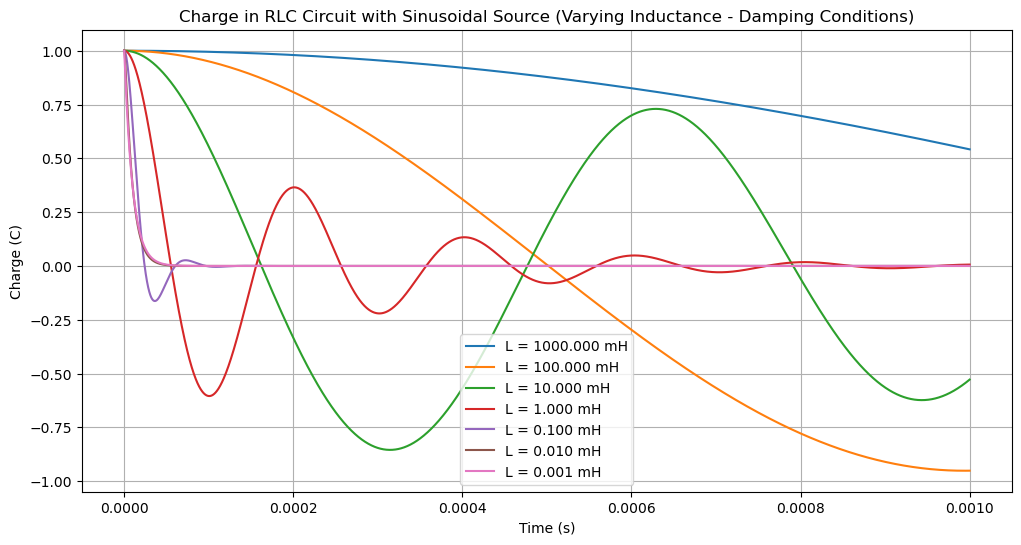

In [ ]:
# Parameters
R = 10  # Resistance in ohms
C = 1e-6  # Capacitance in farads
E_ext = 10  # External voltage amplitude
omega = 2 * np.pi * 500  # Angular frequency of the source (1 kHz)
q0, i0 = 1, 0  # Initial charge and current

# Time span for simulation
t_span = (0, 0.001)  # 10 ms
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Varying inductance values to show different damping conditions in RLC circuit with sinusoidal source
# inductances_damping = [1e-3, 5e-3, 10e-3, 20e-3]  # Different inductance values in henries
inductances_damping = [1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]  # Different inductance values in henries

# Plotting the charge vs time for different inductance values to show damping conditions
plt.figure(figsize=(12, 6))

for L in inductances_damping:
    sol_driven = solve_ivp(rlc_driven_ode, t_span, [q0, i0], args=(R, L, C, E_ext, omega), t_eval=t_eval, method='RK45')
    plt.plot(sol_driven.t, sol_driven.y[0], label=f"L = {L * 1e3:.3f} mH")  # Charge (y[0])

plt.title("Charge in RLC Circuit with Sinusoidal Source (Varying Inductance - Damping Conditions)")
plt.xlabel("Time (s)")
plt.ylabel("Charge (C)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


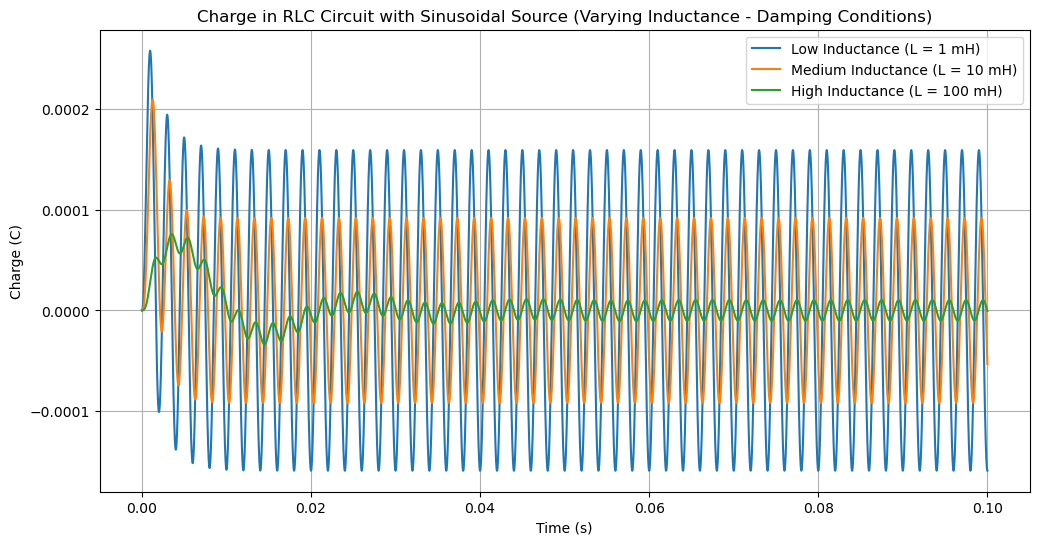

In [68]:
# Parameters for RLC circuit with sinusoidal voltage source (Varying L for different damping conditions)
C = 100e-6  # Capacitance in farads
E_ext = 10  # External voltage amplitude
omega = 2 * np.pi * 500  # Angular frequency of the source (500 Hz)
q0, i0 = 0, 0  # Initial charge and current
R = 20  # Fixed resistance

# Time span for simulation
t_span = (0, 0.1)  # 100 ms
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Inductance values for different damping conditions
inductances_damping = {
    "Low Inductance (L = 1 mH)": 1e-3,
    "Medium Inductance (L = 10 mH)": 10e-3,
    "High Inductance (L = 100 mH)": 100e-3,
}

# Plotting the charge vs time for different inductance values to show damping conditions
plt.figure(figsize=(12, 6))

for label, L in inductances_damping.items():
    sol_driven = solve_ivp(rlc_driven_ode, t_span, [q0, i0], args=(R, L, C, E_ext, omega), t_eval=t_eval, method='RK45')
    plt.plot(sol_driven.t, sol_driven.y[0], label=label)  # Charge (y[0])

plt.title("Charge in RLC Circuit with Sinusoidal Source (Varying Inductance - Damping Conditions)")
plt.xlabel("Time (s)")
plt.ylabel("Charge (C)")
plt.legend(loc="best")
plt.grid(True)
plt.show()
